In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-francies/data-franchise.csv


ANGGOTA :

1. MOCHAMMAD KHAERUL ILMAN (1227050073)
2. ISMAIL MUHAMMAD AHMADI (1227050062)


In [3]:
# path file
file_path = "/kaggle/input/data-francies/data-franchise.csv"

# load dataset
df = pd.read_csv(file_path)

# tampilkan 5 data teratas
df.head()

,id,month_period,revenue,revenue_avg,Province,regional,class
0,bbt2bb2b,2021-01-01,"11341858,91","365866,4166",Sumatera Utara,Regional 1,gold
1,bbt2bb2b,2021-02-01,"11135813,41","383993,566",Sumatera Utara,Regional 1,gold
2,bbt2bb2b,2021-03-01,"11271924,33","363610,4624",Sumatera Utara,Regional 1,gold
3,bbt2bb2b,2021-04-01,"11741655,96","391388,532",Sumatera Utara,Regional 1,gold
4,bbt2bb2b,2021-05-01,12400698,"400022,5161",Sumatera Utara,Regional 1,gold


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69711 entries, 0 to 69710
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            69711 non-null  object
 1   month_period  69711 non-null  object
 2   revenue       69711 non-null  object
 3   revenue_avg   69711 non-null  object
 4   Province      69711 non-null  object
 5   regional      69711 non-null  object
 6   class         69711 non-null  object
dtypes: object(7)
memory usage: 3.7+ MB


In [5]:
# Clean numeric format for revenue & revenue_avg
df['revenue'] = df['revenue'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

df['revenue_avg'] = df['revenue_avg'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['revenue_avg'] = pd.to_numeric(df['revenue_avg'], errors='coerce')

In [6]:
# Jawa-Bali province list
jawa_bali = [
    "DKI Jakarta","Banten","Jawa Barat","Jawa Tengah",
    "DI Yogyakarta","Jawa Timur","Bali"
]

# Filter Jawa-Bali & Januari 2021
mask = df['Province'].isin(jawa_bali) & df['month_period'].str.contains("2021-01")
mean_rev_jan_jawa_bali = df[mask]['revenue'].mean()

print(f"Rata-rata revenue Jawa-Bali bulan Januari 2021: Rp {mean_rev_jan_jawa_bali:,.2f}")


Rata-rata revenue Jawa-Bali bulan Januari 2021: Rp 5,316,299.66


In [7]:
# Pastikan datetime
df['month_period'] = pd.to_datetime(df['month_period'])

# Filter hanya tahun 2021
df2021 = df[df['month_period'].dt.year == 2021]

# Sum monthly revenue per province
monthly = df2021.groupby(['Province','month_period'])['revenue'].sum().reset_index()

# Sort by time
monthly = monthly.sort_values(by=['Province','month_period'])

# Hitung Jan vs Dec untuk setiap provinsi
growth_all = monthly.groupby('Province').agg(
    jan_2021=('revenue','first'),
    dec_2021=('revenue','last')
)

# Rumus growth
growth_all['growth_ratio'] = (growth_all['dec_2021'] - growth_all['jan_2021']) / growth_all['jan_2021']

# Urutkan descending
growth_all_sorted = growth_all.sort_values(by='growth_ratio', ascending=False)

# Tampilkan 10 Besar Growth
print("=== Top 10 Growth Revenue Provinsi Tahun 2021 ===")
print(growth_all_sorted.head(10))

# Tampilkan 10 Besar versi ringkas
print("\n=== Daftar Provinsi & Growth Ratio (Top 10) ===")
for province, row in growth_all_sorted.head(10).iterrows():
    print(f"{province:<20} : {row['growth_ratio']:.4f} ({row['growth_ratio']*100:.2f}%)")

# Alternatif DataFrame bersih (Top 10)
top10_df = growth_all_sorted.reset_index().rename(columns={
    "Province": "Provinsi",
    "growth_ratio": "Growth_2021"
}).head(10)

top10_df

=== Top 10 Growth Revenue Provinsi Tahun 2021 ===
                     jan_2021      dec_2021  growth_ratio
Province                                                 
Papua            5.317022e+07  9.184229e+07      0.727326
Sulawesi Utara   1.400048e+08  2.328904e+08      0.663446
Kepulauan Riau   1.055655e+08  1.627430e+08      0.541630
Jambi            2.323525e+08  3.524602e+08      0.516920
Gorontalo        6.974288e+07  1.018991e+08      0.461068
Sulawesi Tengah  1.858358e+08  2.617808e+08      0.408667
Maluku Utara     1.301119e+07  1.805197e+07      0.387418
DKI Jakarta      1.236689e+09  1.705908e+09      0.379415
Bali             3.630530e+08  4.887574e+08      0.346242
Sulawesi Barat   6.443602e+07  8.654400e+07      0.343100

=== Daftar Provinsi & Growth Ratio (Top 10) ===
Papua                : 0.7273 (72.73%)
Sulawesi Utara       : 0.6634 (66.34%)
Kepulauan Riau       : 0.5416 (54.16%)
Jambi                : 0.5169 (51.69%)
Gorontalo            : 0.4611 (46.11%)
Sulawesi T

,Provinsi,jan_2021,dec_2021,Growth_2021
0,Papua,5.317022e+07,9.184229e+07,0.727326
1,Sulawesi Utara,1.400048e+08,2.328904e+08,0.663446
2,Kepulauan Riau,1.055655e+08,1.627430e+08,0.541630
3,Jambi,2.323525e+08,3.524602e+08,0.516920
4,Gorontalo,6.974288e+07,1.018991e+08,0.461068
5,Sulawesi Tengah,1.858358e+08,2.617808e+08,0.408667
6,Maluku Utara,1.301119e+07,1.805197e+07,0.387418
7,DKI Jakarta,1.236689e+09,1.705908e+09,0.379415
8,Bali,3.630530e+08,4.887574e+08,0.346242
9,Sulawesi Barat,6.443602e+07,8.654400e+07,0.343100


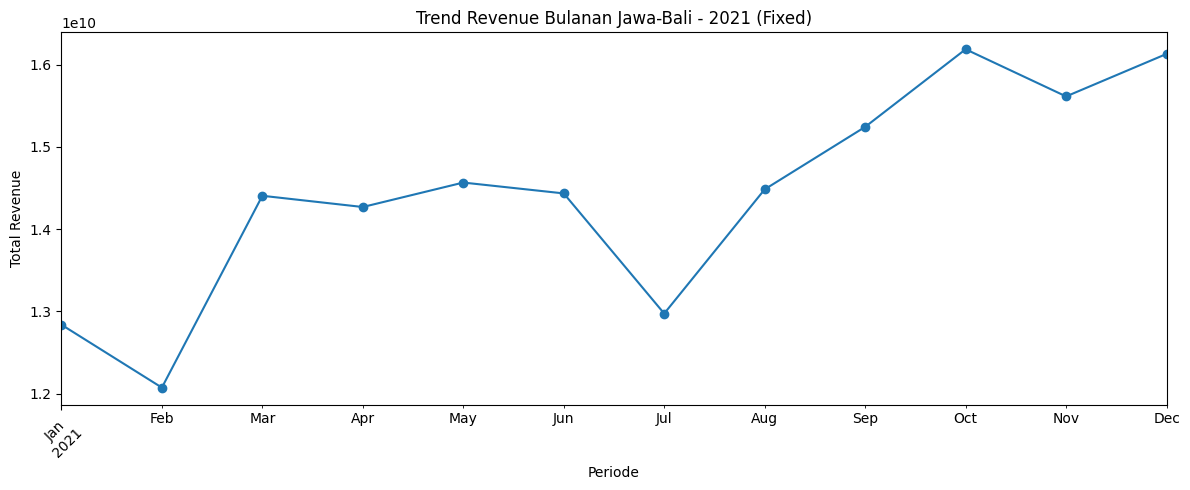

In [8]:
# Pastikan kolom tanggal sudah datetime
df['month_period'] = pd.to_datetime(df['month_period'])

# Filter untuk Provinsi Jawa-Bali & Tahun 2021 saja
trend_jawa_bali = (
    df[
        (df['Province'].isin(jawa_bali)) &
        (df['month_period'].dt.year == 2021)
    ]
    .groupby('month_period')['revenue']
    .sum()
    .sort_index()
)

# Plot ulang grafik
plt.figure(figsize=(12,5))
trend_jawa_bali.plot(kind='line', marker='o')
plt.title("Trend Revenue Bulanan Jawa-Bali - 2021 (Fixed)")
plt.xlabel("Periode")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Jawa-Bali mengalami pemulihan ekonomi bertahap sepanjang 2021, sempat turun akibat PPKM pada pertengahan tahun, lalu kembali bangkit kuat menjelang akhir tahun.


In [9]:
print("""
Insight:
- Pertumbuhan revenue tertinggi ada di Papua dan region luar Jawa → pasar berkembang.
- Jawa-Bali stabil namun pertumbuhan lebih rendah → market mature.
""")



Insight:
- Pertumbuhan revenue tertinggi ada di Papua dan region luar Jawa → pasar berkembang.
- Jawa-Bali stabil namun pertumbuhan lebih rendah → market mature.

